# Nom et Prénoms :

## Base de données "taxis"
Disponible dans Seaborn. Télécharger la base de données ici : <a href="https://iuaci-my.sharepoint.com/:f:/g/personal/evilafo_iua_ci/EorChPlDD5xAvbZIgJ4CX-gBg3dwaN9-M6pjw5b6RHEA0Q?e=5hG9Zv">taxis.csv</a> 👈


<h4 id="sommaire">Questions</h4>
<ol>
    <li><a href="#1">Charger le jeu de données "taxis" et afficher les 1eres données</a></li>
    <li><a href="#2">Changer les nom des colonnes et afficher</a></li>
    <li><a href="#3">Statistiques descriptives</a></li>
    <li><a href="#4">Vérifier les valeurs manquantes</a></li>
    <li><a href="#5">Distance moyenne parcourue par course</a></li>
    <li><a href="#6">Diagramme à barres de la distribution des passagers par course</a></li>
    <li><a href="#7">Comparaison du tarif moyen par type de paiement</a></li>
    <li><a href="#8">Visualisation de la distribution des distances parcourues</a></li>
    <li><a href="#9">Boîte à moustache des distances parcourues par nombre de passagers</a></li>
    <li><a href="#10">Statistiques des distances par nombre de passagers</a></li>
    <li><a href="#11">Tableau croisé du nombre de passagers et du type de paiement et visualisation</a></li>
    <li><a href="#12">Distribution des pourboires donnés</a></li>
    <li><a href="#13">Boîte à moustache des pourboires en fonction du type de paiement</a></li>
    <li><a href="#14">Diagramme en nuage de points de la distance parcourue en fonction du montant payé</a></li>
    <li><a href="#15">Corrélation entre les variables numériques</a></li>
    <li><a href="#16">Visualisation de la heatmap des corrélations</a></li>
</ol>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4 id="1">1. Charger le jeu de données "taxis" et afficher les 1eres données<a href="#sommaire">👆</a></h4>

In [3]:
#Dans la variable "df"
df= pd.read_csv('taxis.csv')
df.head()



,Unnamed: 0,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<h4 id="2">2. Remplacer les noms des colonnes et afficher le resultat<a href="#sommaire">👆</a></h4>

In [4]:
# remplacer les colonnes par :
# "pickup":"depart"
df.rename(columns={"pickup":"départ"}, inplace=True)
# "dropoff":"arrivee"
df.rename(columns={"dropoff":"arrivée"}, inplace=True)
# "passengers":"nbpassagers"
df.rename(columns={"passengers":"nbpassagers"}, inplace=True)
# "fare":"tarif"
df.rename(columns={"fare":"tarif"}, inplace=True)
# "tip":"pourboire"
df.rename(columns={"tip":"pourboire"}, inplace=True)
# "tolls":"peage"
df.rename(columns={"tolls":"peage"}, inplace=True)
# "color":"couleur"
df.rename(columns={"color":"couleur"}, inplace=True)
# "pickup_zone":"zone_depart"
df.rename(columns={"pickup_zone":"zone_depart"}, inplace=True)
# "dropoff_zone":"zone_arrivee"
df.rename(columns={"dropoff_zone":"zone_arrivee"},inplace=True)
# "pickup_borough":"arrondissement_depart"
df.rename(columns={"pickup_borough":"arrondissement_depart"}, inplace=True)
# "dropoff_borough":"arrondissement_arrivee"
df.rename(columns={"dropoff_borough":"arrondissement_arrivee"}, inplace=True)
df.head()


,Unnamed: 0,départ,arrivée,nbpassagers,distance,tarif,pourboire,peage,total,couleur,payment,zone_depart,zone_arrivee,arrondissement_depart,arrondissement_arrivee
0,0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<h4 id="3">3. Statistique descriptive<a href="#sommaire">👆</a></h4>

In [5]:
df.describe()

,Unnamed: 0,nbpassagers,distance,tarif,pourboire,peage,total
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,3216.000000,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1857.191473,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1608.000000,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,3216.000000,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,4824.000000,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6432.000000,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


<h4 id="4">4. Valeurs manquantes<a href="#sommaire">👆</a></h4>

In [6]:
#df.dropna(inplace=True)
#df.head()

#correction
df.isnull().sum()

Unnamed: 0                 0
départ                     0
arrivée                    0
nbpassagers                0
distance                   0
tarif                      0
pourboire                  0
peage                      0
total                      0
couleur                    0
payment                   44
zone_depart               26
zone_arrivee              45
arrondissement_depart     26
arrondissement_arrivee    45
dtype: int64

<h4 id="5">5. Distance moyenne parcourue par course<a href="#sommaire">👆</a></h4>

In [7]:
# Calcul de la distance moyenne par course
a= df['distance'].mean()
print(f"Distance moyenne par course: {a:.2f} m")


Distance moyenne par course: 3.02 m


<h4 id="6">6. Diagramme à barres de la distribution des passagers par course<a href="#sommaire">👆</a></h4>

In [8]:
# Nombre de passagers par course
nb_passagers = df['nbpassagers'].value_counts()
nb_passagers


nbpassagers
1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: count, dtype: int64

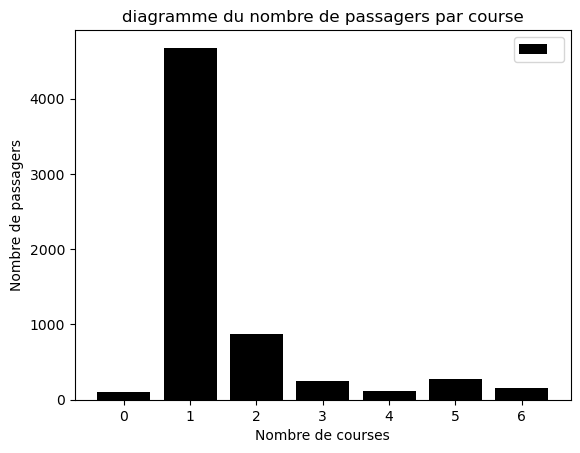

In [9]:
# Diagramme à barres du nombre de passagers par course
x= nb_passagers.index
y= nb_passagers.values
plt.bar(x, y, color='black')
plt.title('diagramme du nombre de passagers par course')
plt.xlabel('Nombre de courses')
plt.ylabel('Nombre de passagers')
plt.legend([''])
plt.show()


<h4 id="7">7. Comparaison du tarif moyen par type de paiement <a href="#sommaire">👆</a></h4>

In [10]:
# Calcul du tarif moyen par type de paiement
df.groupby("payment")["tarif"].mean()

payment
cash           11.592991
credit card    13.694750
Name: tarif, dtype: float64

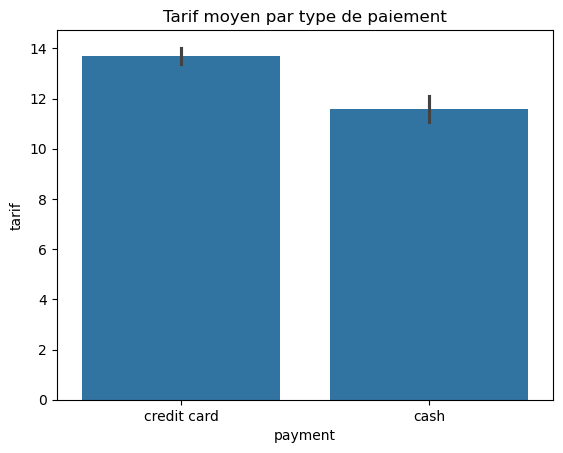

In [11]:
# Afficher le graphique du tarif moyen par type de paiement (barplot)
sns.barplot(x='payment', y='tarif', data=df)
plt.title('Tarif moyen par type de paiement')
plt.show()



<h4 id="8">8. Distribution des distances parcourues<a href="#sommaire">👆</a></h4>

Text(0.5, 1.0, 'Distribution du tarif')

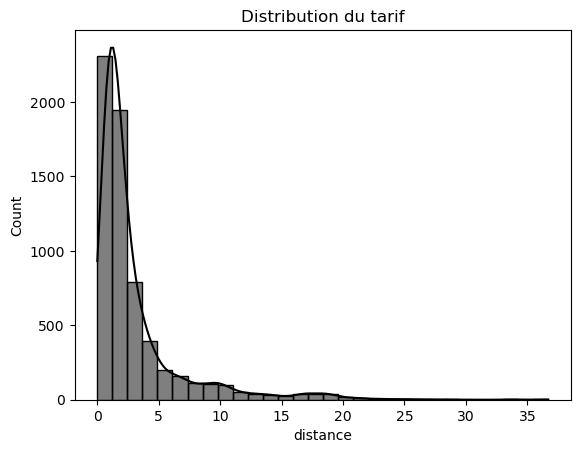

In [12]:
# Avec la courbe de densité (histplot)
sns.histplot(data=df, x="distance", bins=30, kde=True, color='black')
plt.title('Distribution du tarif')

<h4 id="9">9. Distribution des distances parcourues par nombre de passagerd<a href="#sommaire">👆</a></h4>

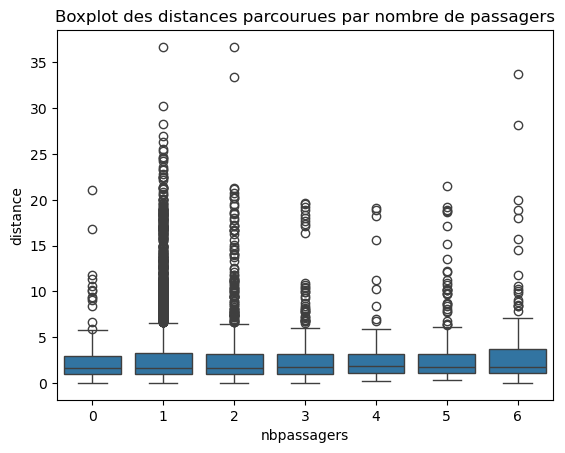

In [13]:
# Boîte à moustache des distances parcourues par nombre de passagers (boxplot)
sns.boxplot(x='nbpassagers', y='distance', data=df)
plt.title('Boxplot des distances parcourues par nombre de passagers')
plt.show()


<h4 id="10">10. Statistiques descriptive des distances parcourues par nombre de passagers<a href="#sommaire">👆</a></h4>

In [14]:
#Statistiques descriptive des distances parcourues par nombre de passagers
df.groupby('nbpassagers')['distance'].describe().describe()



,count,mean,std,min,25%,50%,75%,max
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,919.000000,3.069072,3.873986,0.068571,1.012857,1.685000,3.203571,26.930000
std,1679.267499,0.196493,0.445551,0.119363,0.059098,0.086168,0.236140,8.306112
min,96.000000,2.936455,3.529105,0.000000,0.930000,1.580000,2.925000,19.160000
25%,131.500000,2.962302,3.565554,0.000000,0.978750,1.620000,3.107500,20.360000
50%,243.000000,2.978596,3.798981,0.000000,1.000000,1.700000,3.167500,21.510000
75%,576.500000,3.077545,3.926156,0.100000,1.050000,1.725000,3.213750,35.210000
max,4678.000000,3.488758,4.806399,0.280000,1.102500,1.825000,3.690000,36.700000


<h4 id="11">11. Tableau croisé du nombre de passagers et du type de paiement<a href="#sommaire">👆</a></h4>

In [15]:
# Tableau croisé du nombre de passagers et du type de paiement
tableau_croise = pd.crosstab(df['nbpassagers'], df['payment'], margins=True, margins_name="Total")
print(tableau_croise)


payment      cash  credit card  Total
nbpassagers                          
0              13           77     90
1            1312         3334   4646
2             262          609    871
3              79          164    243
4              29           80    109
5              78          199    277
6              39          114    153
Total        1812         4577   6389


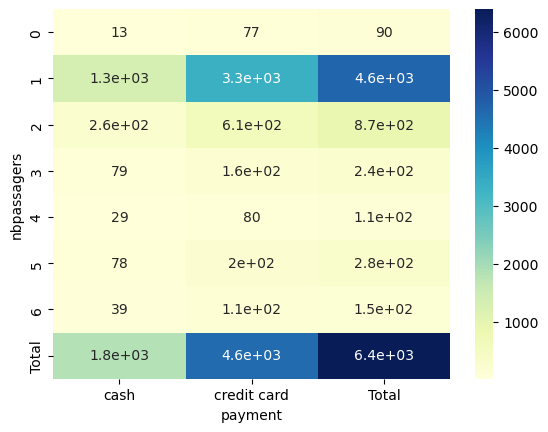

In [16]:
# Visualisation (heatmap avec les annotations)
sns.heatmap(tableau_croise, annot=True, cmap="YlGnBu")
plt.show()



<h4 id="12">12. Distribution des pourboires donnés<a href="#sommaire">👆</a></h4>

<Axes: xlabel='pourboire', ylabel='Count'>

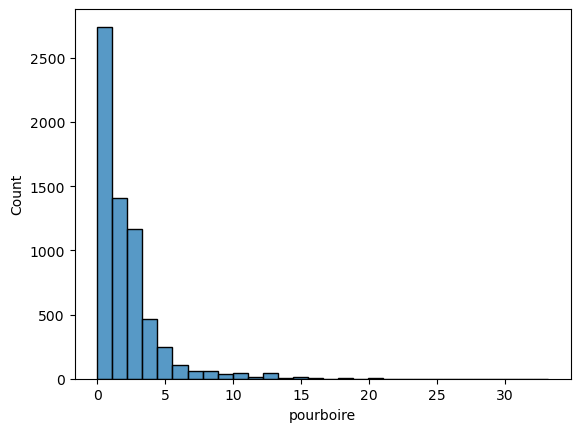

In [17]:
# Avec histplot
sns.histplot(data=df, x="pourboire", bins=30)


<h4 id="13">13. Boxplot des pourboires en fonction du type de paiement<a href="#sommaire">👆</a></h4>

In [18]:
# Calcul des pourboires en foncion du type de paiement
df.groupby("payment")["pourboire"].sum()


payment
cash               0.00
credit card    12732.32
Name: pourboire, dtype: float64

<Axes: xlabel='payment', ylabel='pourboire'>

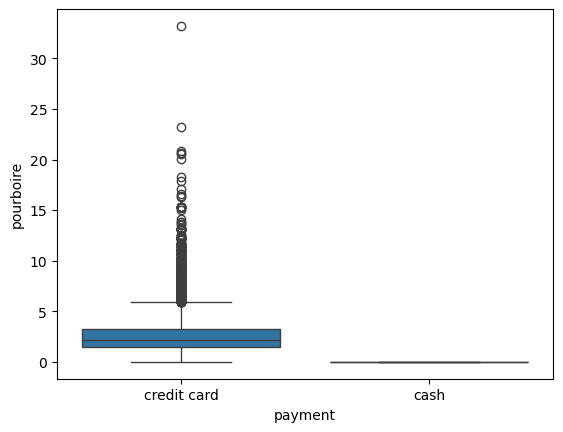

In [19]:
# Boîte à moustache des pourboires en foncion du type de paiement
sns.boxplot(data=df, x="payment", y="pourboire")


<h4 id="14">14. Diagramme en nuage de points de la distance parcourue en fonction du montant payé<a href="#sommaire">👆</a></h4>

C:\Users\mouba\AppData\Local\Temp\ipykernel_20548\1804660557.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='tarif', y='distance', data=df, palette='Set2')


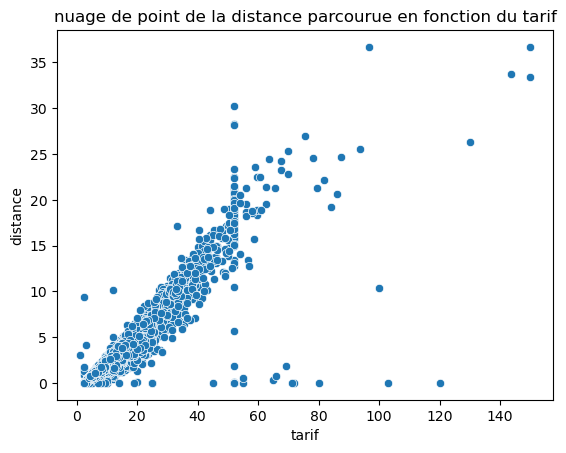

In [20]:
# Scatterplot
sns.scatterplot(x='tarif', y='distance', data=df, palette='Set2')
plt.title('nuage de point de la distance parcourue en fonction du tarif')
plt.show()


<h4 id="15">15. Corrélation entre les variables numériques<a href="#sommaire">👆</a></h4>

In [21]:
#Avec df.corr
correlation = df.corr(numeric_only=True)
correlation




,Unnamed: 0,nbpassagers,distance,tarif,pourboire,peage,total
Unnamed: 0,1.000000,-0.056183,0.034017,0.030036,-0.127919,-0.013578,-0.032786
nbpassagers,-0.056183,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.034017,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
tarif,0.030036,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
pourboire,-0.127919,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
peage,-0.013578,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,-0.032786,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


<h4 id="16">16. Visualisation de la heatmap des corrélations<a href="#sommaire">👆</a></h4>

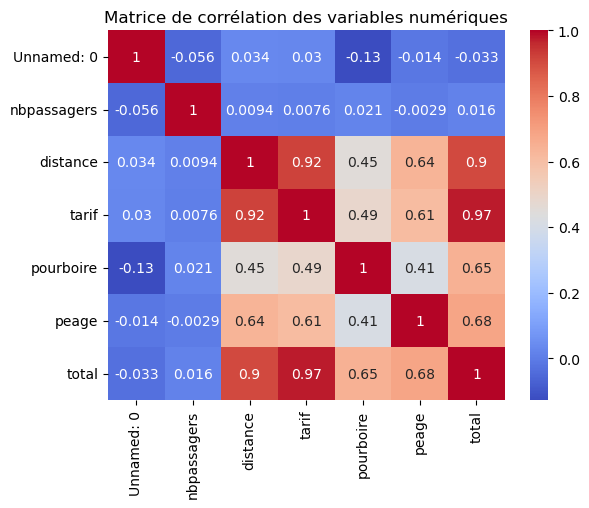

In [22]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()